In [115]:
import numpy as np
import pandas as pd
import tensorflow
import torch as th
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [18]:
pip install pandas openpyxl xlrd

     ---------------------------------------- 96.5/96.5 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [77]:
data = pd.read_excel(r"C:\Users\DELL\OneDrive\Desktop\IIT K\Secy Recruitment\PClub\Machine Learning\LungCap.xls")
data.head()

,TidalLungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [78]:
data["Age( years)"] = data["Age( years)"]/data["Age( years)"].max()
data["Height(inches)"] = data["Height(inches)"]/data["Height(inches)"].max()
data["TidalLungCap(cc)"] = data["TidalLungCap(cc)"]/data["TidalLungCap(cc)"].max()
data["Smoke"] = (data["Smoke"] == "yes").astype(float)
data["Caesarean"] = (data["Caesarean"] == "no").astype(float)
data["Gender"] = (data["Gender"] == "male").astype(float)

data.head()

,TidalLungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,0.441227,0.315789,0.759169,0.0,1.0,1.0
1,0.689949,0.947368,0.913203,1.0,0.0,1.0
2,0.650767,0.842105,0.852078,0.0,0.0,0.0
3,0.758092,0.736842,0.867971,0.0,1.0,1.0
4,0.327087,0.263158,0.695599,0.0,1.0,1.0


<Axes: >

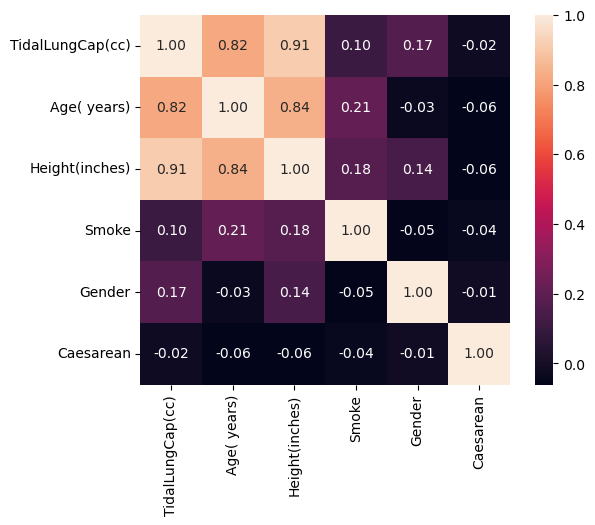

In [79]:
sns.heatmap(data.corr(), annot=True, square=True, fmt='0.2f')

In [80]:
X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [124]:
def knn(sample, X, y, k_neighbors=5):
    sample = sample.unsqueeze(1).T
    dist = (X - sample).pow(2).sum(axis=1).sqrt()
    _, indices = torch.sort(dist)
    y = y[indices][:k_neighbors]
    
    return torch.mean(y).item()         

In [148]:
def train_knn(X_train, X_test, y_train, y_test, k_neighbors=5):
    y_pred_test = np.zeros(y_test.shape, dtype=np.float32)
    y_pred_train = np.zeros(y_train.shape, dtype=np.float32)
    
    for i in range(X_test.shape[0]):
        y_pred_test[i] = knn(X_test[i], X_train, y_train, k_neighbors=k_neighbors)
    y_pred_test = torch.tensor(y_pred_test, dtype=torch.float32) 
    
    mse = mean_squared_error(y_test.numpy(), y_pred_test)
    print(mse)
    print("R-score:", r2_score(y_test.numpy(), y_pred_test))
    return y_pred_test

In [151]:
pred_test = train_knn(X_train, X_test, y_train, y_test, k_neighbors=4)

0.008247962705416686
R-score: 0.7505278792234801
